In [1]:
import pandas as pd
import talib
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
#import seaborn as sns
#from seaborn import sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

mydata=pd.read_csv('fundamentals.csv')
mydata.set_index('Unnamed: 0')
mydata2= pd.read_csv('prices.csv')
mydata2

mydata2['datetime'] = pd.to_datetime(mydata2['date'])
mydata2 = mydata2.set_index('datetime')
mydata2.drop(['date'], axis=1, inplace=True)
mydata2.info()
mydata2.describe()


mydata2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


,symbol,open,close,low,high,volume
datetime,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0


In [23]:
googl=mydata2[mydata2['symbol']=='GOOGL']

training_set = googl.iloc[:,1:6]
training_set

,open,close,low,high,volume
datetime,,,,,
2010-01-04,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,592.000005,602.020005,589.110015,603.250036,9439100.0
2010-01-11,604.460006,601.110027,594.040017,604.460006,14411300.0
2010-01-12,597.649989,590.479981,587.999981,598.160038,9696800.0
2010-01-13,576.490018,587.090003,573.900020,588.380033,12980200.0
2010-01-14,583.900020,589.849997,582.809986,594.200013,8471700.0


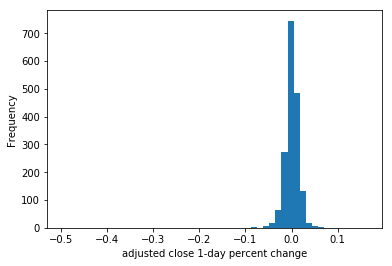

In [21]:
googl['close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [24]:
#Data cleaning
training_set.isna().any()
# Feature Scaling Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [27]:
#Building the RNN LSTM model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#Using TensorFlow backend.

Using TensorFlow backend.
/Users/armenio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/armenio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/armenio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/armenio/anaconda3/lib/python3.7/site-packag

In [29]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0247
Epoch 2/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0101
Epoch 3/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0081
Epoch 4/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0061
Epoch 5/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0056
Epoch 6/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0058
Epoch 8/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 21s 17ms/step - loss

1198/1198 [==============================] - 22s 18ms/step - loss: 0.0013
Epoch 85/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0015
Epoch 86/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0016
Epoch 87/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0016
Epoch 88/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0016
Epoch 89/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0015
Epoch 90/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0017
Epoch 91/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0018
Epoch 92/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0017
Epoch 93/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0013
Epoch 94/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0013
Epoch 95/100
1198/1198 [==============================] 

In [ ]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
real_stock_price = dataset_test.iloc[:, 1:2].values
# Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)